<a href="https://colab.research.google.com/github/rubengamarro/Kobe/blob/main/kobeFINAL_DE_VERDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

In [ ]:
# Cargamos una base de datos preexistente
kobedata = pd.read_csv('https://raw.githubusercontent.com/raguiso/kobebryant/main/data.csv', sep =',')

# Primero, nos aseguramos de que el valor de la season esté en formato numérico
kobedata['season_numeric'] = kobedata['season'].apply(lambda x: int(x.split('-')[0]))

# Ahora filtramos las temporadas deseadas
kobedata_filtered = kobedata[(kobedata['season_numeric'] >= 1998) & (kobedata['season_numeric'] <= 2012)]
kobedata_filtered = kobedata[(kobedata['period'] >= 1) & (kobedata['period'] <= 4)]
#Eliminamos las columnas (categorías e indicadores) que no vamos a analizar
columns_to_drop_estudio = [ 'game_event_id', 'game_id', 'season_numeric','loc_x','loc_y', 'lat','lon','period', 'team_id','season','action_type','shot_zone_area',
                   'game_date', 'matchup', 'opponent', 'team_name', 'playoffs', 'seconds_remaining','shot_zone_range','shot_type','shot_id','shot_zone_basic']
kobedata_estudio = kobedata_filtered.drop(columns=columns_to_drop_estudio)


kobedata_estudio = pd.get_dummies(kobedata_estudio)

#columns_to_drop_estudio = ['action_type_Jump Shot','action_type_Layup Shot']
#kobedata_estudio = kobedata_estudio.drop(columns=columns_to_drop_estudio)
# Eliminar filas donde haya NaN
kobedata_estudio.dropna(inplace=True)

kobedata_estudio







,minutes_remaining,shot_distance,shot_made_flag,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
1,10,15,0.0,False,False,False,True,False,False
2,7,16,1.0,False,False,False,True,False,False
3,6,22,0.0,False,False,False,True,False,False
4,6,0,1.0,False,True,False,False,False,False
5,9,14,0.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
30691,7,0,0.0,False,False,False,False,True,False
30692,6,4,0.0,False,False,False,True,False,False
30694,3,21,1.0,False,False,False,True,False,False
30695,2,26,0.0,False,False,False,True,False,False


<Axes: xlabel='shot_made_flag', ylabel='index'>

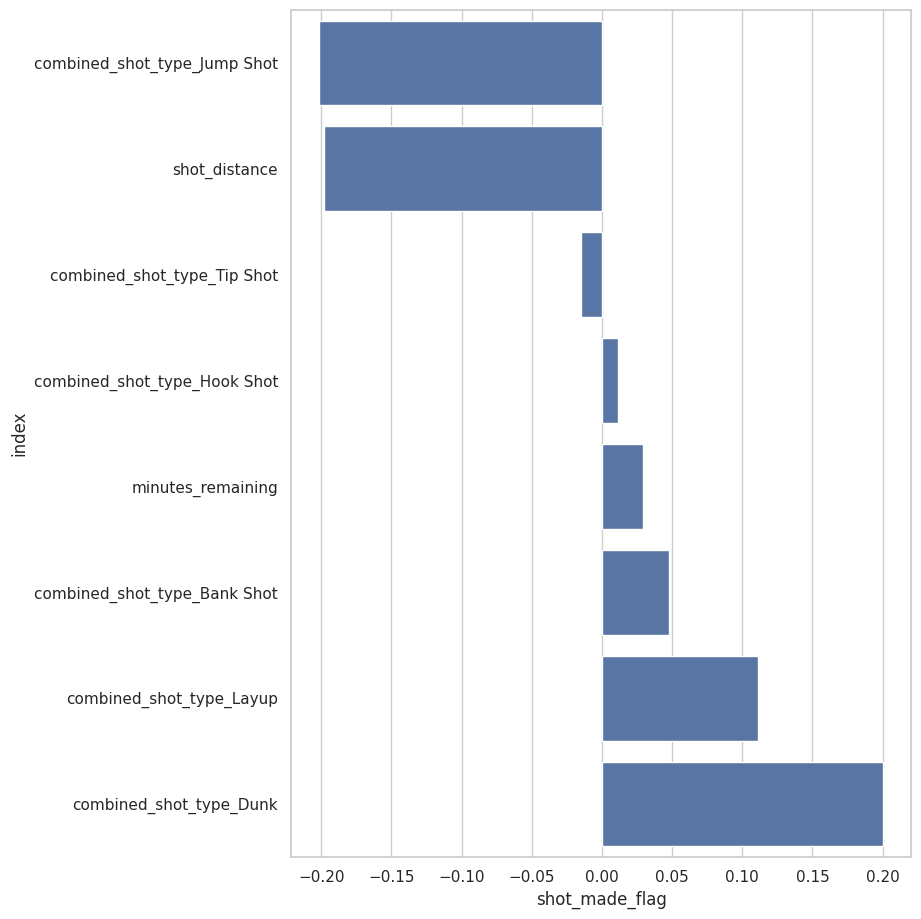

In [ ]:
plt.figure(figsize=(8,11))
corr = kobedata_estudio.corr()['shot_made_flag'].sort_values(ascending=True).reset_index()[0:8]
sns.barplot(data=corr, x='shot_made_flag',y='index')

In [ ]:
X = kobedata_estudio.drop('shot_made_flag', axis=1)
y = kobedata_estudio['shot_made_flag'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=5665)

In [ ]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

from sklearn import metrics
pred_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, pred_test))

X_train:(17766, 8)
X_test:(7614, 8)

y_train:(17766,)
y_test:(7614,)
0.6217494089834515


In [ ]:
print("Coeficientes:", list(zip(X.columns, model.coef_.flatten(), )))

Coeficientes: [('minutes_remaining', 0.01153024919043135), ('shot_distance', -0.024952870876241262), ('combined_shot_type_Bank Shot', 0.8747625089444232), ('combined_shot_type_Dunk', 1.881492615881313), ('combined_shot_type_Hook Shot', -0.4141584233582695), ('combined_shot_type_Jump Shot', -0.5476237643015733), ('combined_shot_type_Layup', -0.2724251922943985), ('combined_shot_type_Tip Shot', -1.073729546298005)]


In [ ]:
print("clasifica bien el ", metrics.accuracy_score(y_test, pred_test)*100, "%  de los datos")

clasifica bien el  62.174940898345156 %  de los datos


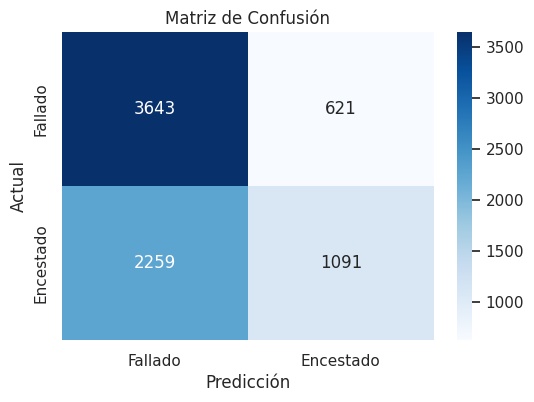

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

X_train:(17766, 8)
X_test:(7614, 8)

y_train:(17766,)
y_test:(7614,)
Exactitud con umbral 0.35: 0.49


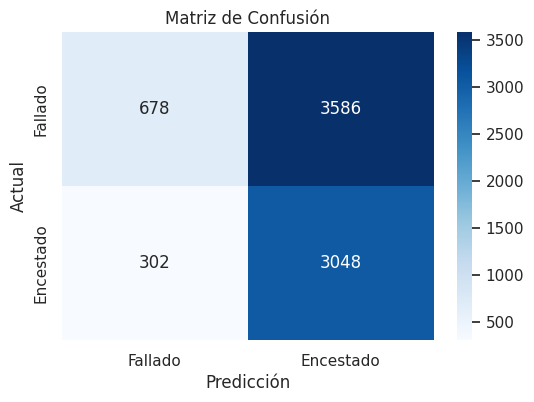

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=5665)

print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

# Obtener las probabilidades de pertenecer a la clase positiva
# (Es decir, la probabilidad de que el tiro sea encestado)
y_prob = model.predict_proba(X_test)[:, 1]

# Aplicar el nuevo umbral de 0.35
y_pred_new_threshold = (y_prob >= 0.35).astype(int)

# Evaluar el rendimiento con el nuevo umbral
accuracy = accuracy_score(y_test, y_pred_new_threshold)
print(f"Exactitud con umbral 0.35: {accuracy:.2f}")

# Imprimir la matriz de confusión para ver el impacto del nuevo umbral
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

X_train:(17766, 8)
X_test:(7614, 8)

y_train:(17766,)
y_test:(7614,)
Exactitud con umbral 0.45: 0.60


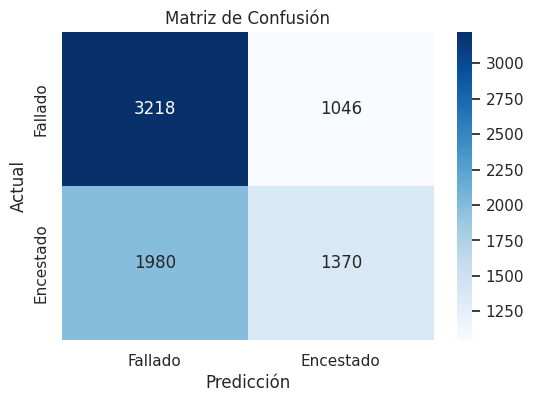

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=5665)

print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

y_prob = model.predict_proba(X_test)[:, 1]

# Aplicar el nuevo umbral de 0.45
y_pred_new_threshold = (y_prob >= 0.45).astype(int)

# Evaluar el rendimiento con el nuevo umbral
accuracy = accuracy_score(y_test, y_pred_new_threshold)
print(f"Exactitud con umbral 0.45: {accuracy:.2f}")

# Imprimir la matriz de confusión para ver el impacto del nuevo umbral
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

X_train:(17766, 8)
X_test:(7614, 8)

y_train:(17766,)
y_test:(7614,)
Exactitud con umbral 0.6: 0.60


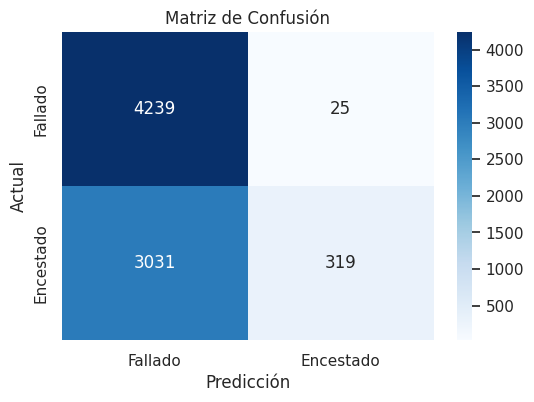

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=5665)

print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

y_prob = model.predict_proba(X_test)[:, 1]

# Aplicar el nuevo umbral de 0.6
y_pred_new_threshold = (y_prob >= 0.6).astype(int)

# Evaluar el rendimiento con el nuevo umbral
accuracy = accuracy_score(y_test, y_pred_new_threshold)
print(f"Exactitud con umbral 0.6: {accuracy:.2f}")

# Imprimir la matriz de confusión para ver el impacto del nuevo umbral
conf_matrix = confusion_matrix(y_test, y_pred_new_threshold)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fallado', 'Encestado'], yticklabels=['Fallado', 'Encestado'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

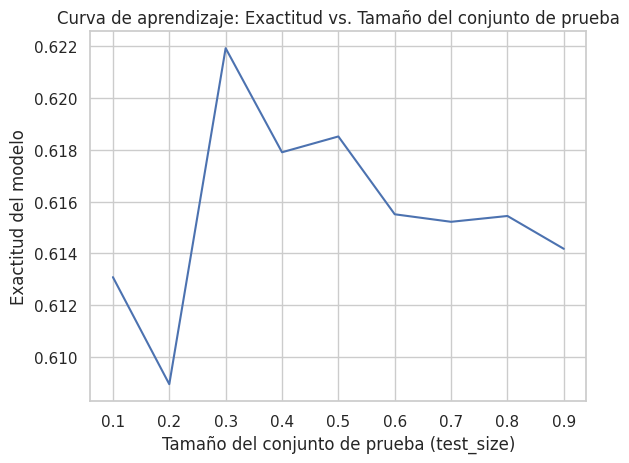

In [ ]:
# prompt: generame una curva de aprendizaje entre el tamaño del conjunto test_size (entre 0 y 1)  y la accuracy del modelo

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

test_sizes = np.linspace(0.1, 0.9, 9)  # Valores de test_size entre 0.1 y 0.9
accuracies = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5665)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(test_sizes, accuracies)
plt.xlabel("Tamaño del conjunto de prueba (test_size)")
plt.ylabel("Exactitud del modelo")
plt.title("Curva de aprendizaje: Exactitud vs. Tamaño del conjunto de prueba")
plt.show()
